In [14]:
#Import Dependancies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
#Import the datetime module from the datetime library
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import linregress
from scipy.stats import linregress
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
lat_lngs
# Add the latitudes and longitudes to a list.
coordinates = lat_lngs

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


609

In [4]:
#Create empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval       ")
print("---------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval       
---------------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | pasighat
Processing Record 4 of Set 1 | balabac
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 1 | crateus
Processing Record 8 of Set 1 | lavrentiya
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | kralendijk
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | lazaro cardenas
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | bartica
Processing Record 20 of Set 1 | husavik
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set 1 | dunedin
Processing 

City not found. Skipping...
Processing Record 42 of Set 4 | barawe
City not found. Skipping...
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | bathsheba
Processing Record 45 of Set 4 | kousseri
Processing Record 46 of Set 4 | pochutla
Processing Record 47 of Set 4 | haines junction
Processing Record 48 of Set 4 | port hardy
Processing Record 49 of Set 4 | lompoc
Processing Record 50 of Set 4 | lolua
City not found. Skipping...
Processing Record 1 of Set 5 | isla mujeres
Processing Record 2 of Set 5 | puerto lempira
Processing Record 3 of Set 5 | fort walton beach
Processing Record 4 of Set 5 | manadhoo
Processing Record 5 of Set 5 | shenjiamen
Processing Record 6 of Set 5 | tuatapere
Processing Record 7 of Set 5 | kloulklubed
Processing Record 8 of Set 5 | najran
Processing Record 9 of Set 5 | cherskiy
Processing Record 10 of Set 5 | codajas
Processing Record 11 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 5 | georgiyevka

Processing Record 26 of Set 8 | port lincoln
Processing Record 27 of Set 8 | comodoro rivadavia
Processing Record 28 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 29 of Set 8 | yantal
Processing Record 30 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 31 of Set 8 | rocha
Processing Record 32 of Set 8 | codrington
Processing Record 33 of Set 8 | nyurba
Processing Record 34 of Set 8 | kuche
City not found. Skipping...
Processing Record 35 of Set 8 | kruisfontein
Processing Record 36 of Set 8 | portalegre
Processing Record 37 of Set 8 | nea alikarnassos
Processing Record 38 of Set 8 | hofn
Processing Record 39 of Set 8 | murgab
Processing Record 40 of Set 8 | thaba nchu
Processing Record 41 of Set 8 | zarubino
Processing Record 42 of Set 8 | san carlos de bariloche
Processing Record 43 of Set 8 | conceicao do araguaia
Processing Record 44 of Set 8 | malakal
Processing Record 45 of Set 8 | uvat
Processing Record 46 of Set 8 | manokwari
Proc

Processing Record 13 of Set 12 | maniitsoq
Processing Record 14 of Set 12 | tarhunah
City not found. Skipping...
Processing Record 15 of Set 12 | poddorye
Processing Record 16 of Set 12 | whitehorse
Processing Record 17 of Set 12 | cap malheureux
Processing Record 18 of Set 12 | saldanha
Processing Record 19 of Set 12 | luena
Processing Record 20 of Set 12 | calvinia
Processing Record 21 of Set 12 | copiapo
Processing Record 22 of Set 12 | silver city
Processing Record 23 of Set 12 | dalby
Processing Record 24 of Set 12 | egvekinot
Processing Record 25 of Set 12 | hunchun
Processing Record 26 of Set 12 | jiwani
Processing Record 27 of Set 12 | wilmington
Processing Record 28 of Set 12 | osypenko
Processing Record 29 of Set 12 | pemangkat
Processing Record 30 of Set 12 | porto novo
Processing Record 31 of Set 12 | artyk
City not found. Skipping...
Processing Record 32 of Set 12 | huaicheng
Processing Record 33 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 34 of Se

In [5]:
#Convert the array of dictionaries to a pandas df
city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]

#Create an output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export data to CSV
city_data_df.to_csv(output_data_file, index_label = "City ID")

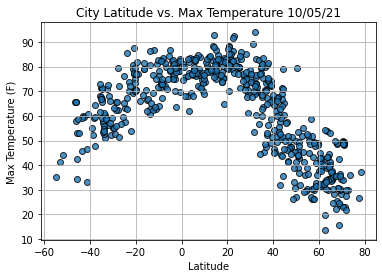

In [6]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

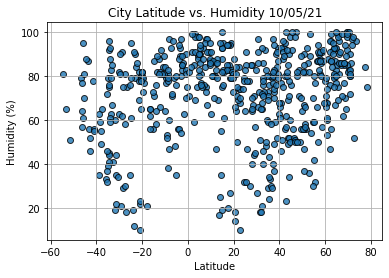

In [7]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

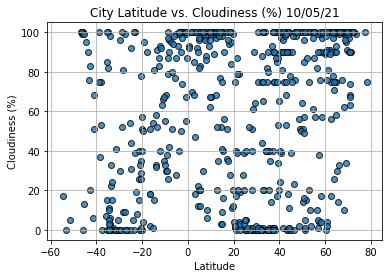

In [8]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

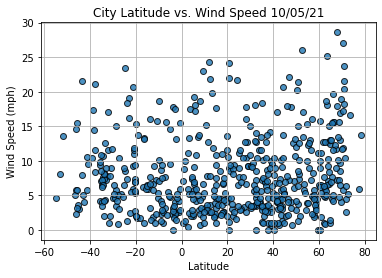

In [9]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

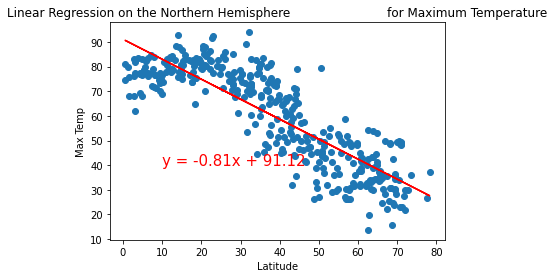

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

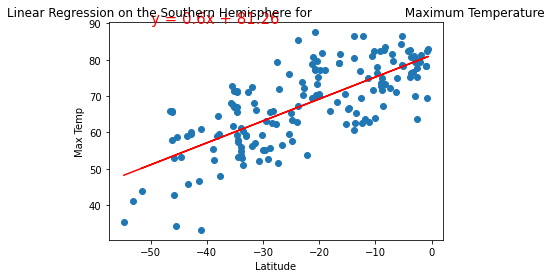

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \
                       Maximum Temperature', 'Max Temp',(-50,90))

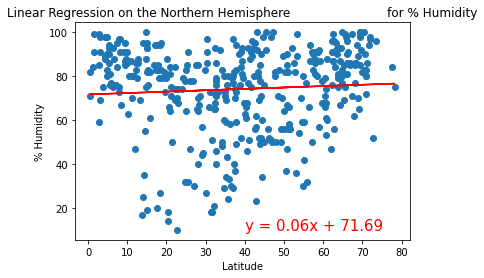

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

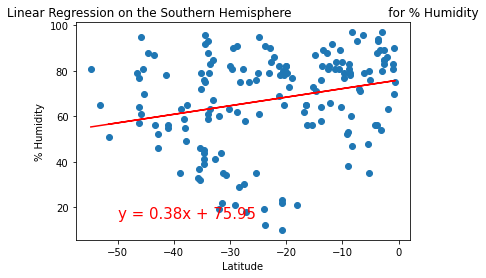

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

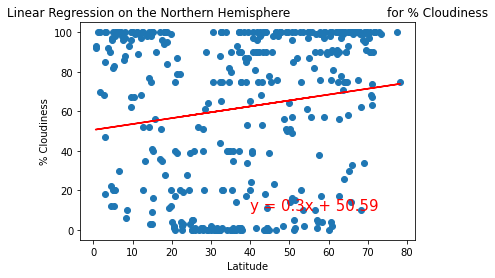

In [32]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

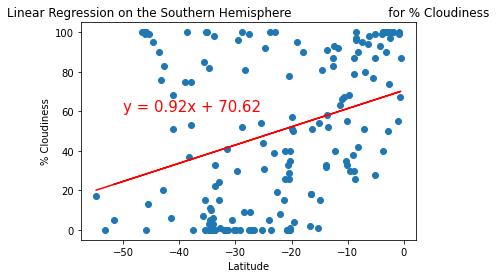

0.11156719471377645


In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


#This finds the r value
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

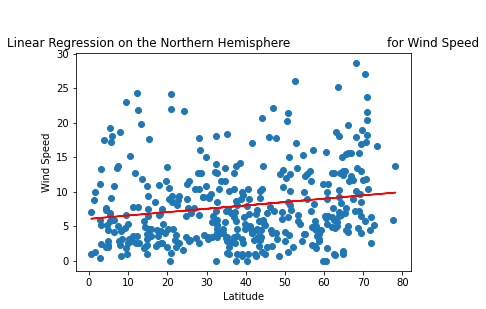

0.03125401678876561


In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

#This finds the r value
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

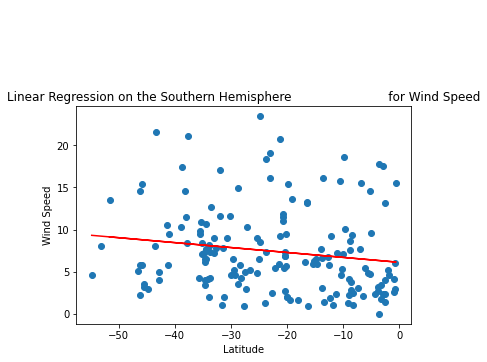

0.025941805204969578


In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
#This finds the r value
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)